<a href="https://colab.research.google.com/github/Gokul0Krishna/exp/blob/main/exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t1

In [ ]:
!unzip "/content/football players.v2i.yolov5pytorch.zip"

Archive:  /content/football players.v2i.yolov5pytorch.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/yt-NfzkB0v31Pg-0009_jpg.rf.8c94b6f7e2f93d77bf33fa4e740b90e0.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0011_jpg.rf.dd8cce210aef4b83e11dd8e851add934.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0012_jpg.rf.b5165914840af0159721c1b774c0f743.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0024_jpg.rf.6032a83254029bf74e2710a86f9f36cb.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0034_jpg.rf.cdfec2540651bc946b57fc5b9f05dcf9.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0038_jpg.rf.467cd1fbc8e0727dbcf5e0c1b6dcd271.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0051_jpg.rf.50556582ff74153fc5e60ad3c2bdf913.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0055_jpg.rf.09e34420f04db6f62b2c0cb8e7ca7f00.jpg  
 extracting: test/images/yt-NfzkB0v31Pg-0061_jpg.rf.cf1

In [ ]:
!pip install opencv-python matplotlib numpy torch torchvision ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [1]:
import cv2
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
from skimage.feature import local_binary_pattern
def er(image):
  grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  grad_mag = np.sqrt(grad_x**2 + grad_y**2)
  return np.mean(grad_mag)

def obj_found(image):
  image = (image * 255).astype(np.uint8)
  params = cv2.SimpleBlobDetector_Params()
  params.filterByArea = True
  params.minArea = 10  # Minimum blob size (adjust for small objects)
  params.maxArea = 1000
  detector = cv2.SimpleBlobDetector_create(params)
  keypoints = detector.detect(image)
  return len(keypoints)

def complexity(image):
  image = np.array(image).reshape(len(image), -1)
  lbp = local_binary_pattern(image, 8, 1, method="uniform")#greater the no. more complex the image
  hist, _ = np.histogram(lbp, bins=8+2, range=(0, 8+2))
  hist = hist.astype(np.float32) / hist.sum()
  grad_mag=-np.sum(hist * np.log(hist + 1e-6))
  return grad_mag

def ed(image):
  local_var = cv2.Laplacian(image, cv2.CV_32F).var()#The Laplacian operator highlights regions of rapid intensity change (edges),High variance = many strong edges = likely not occluded
  return local_var / (np.mean(image)+ 1e-6)

In [3]:
def is_blurry(image):
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(image, cv2.CV_64F).var()

def brightness(img):
    brightness = np.mean(img)
    return brightness

def contrast(img):
    return np.std(img)


## edge density

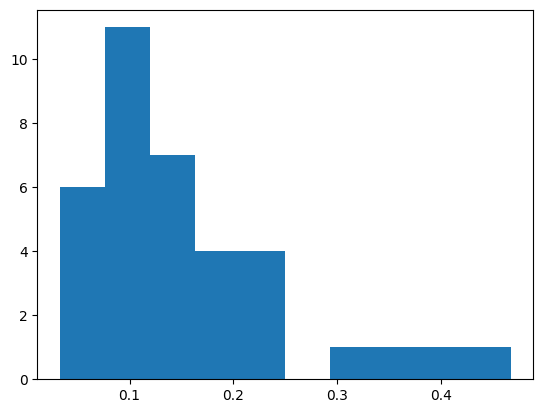

In [ ]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    data1.append(ed(img))
plt.hist(data1)
plt.show()


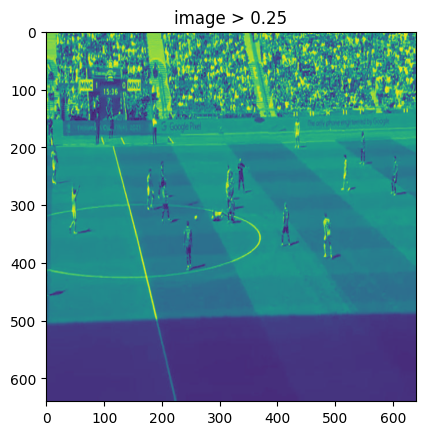

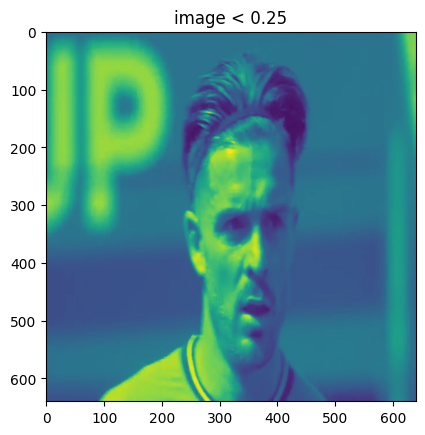

In [ ]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(imga, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    if l1:
      if ed(imga)>0.25:
        plt.imshow(imga)
        plt.title("image > 0.25")
        plt.show()
        l1=False
    if l2:
      if ed(imga)<0.25:
        plt.imshow(imga)
        plt.title("image < 0.25")
        plt.show()
        l2=False

## brightness

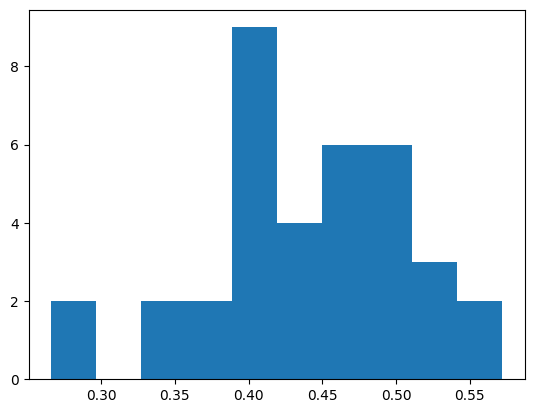

In [ ]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    data1.append(brightness(img))
plt.hist(data1)
plt.show()


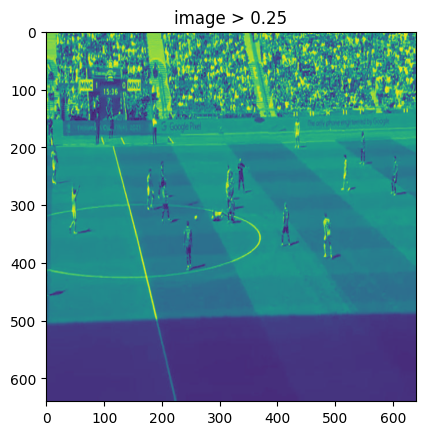

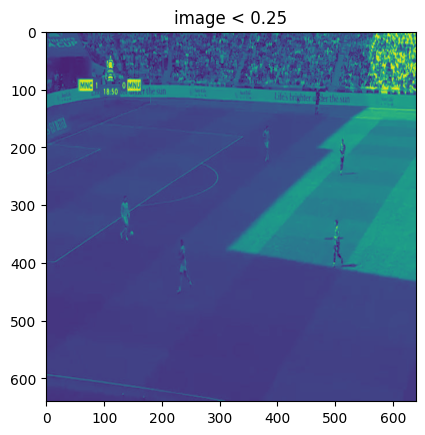

In [ ]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    # img = cv2.resize(imga, (28,28))
    # img = np.array(img, dtype=np.float32) / 255.0
    # img = img.flatten()
    if l1:
      if brightness_contrast(imga)>80:
        plt.imshow(imga)
        plt.title("image > 0.25")
        plt.show()
        l1=False
    if l2:
      if brightness_contrast(imga)<80:
        plt.imshow(imga)
        plt.title("image < 0.25")
        plt.show()
        l2=False

## Contrast

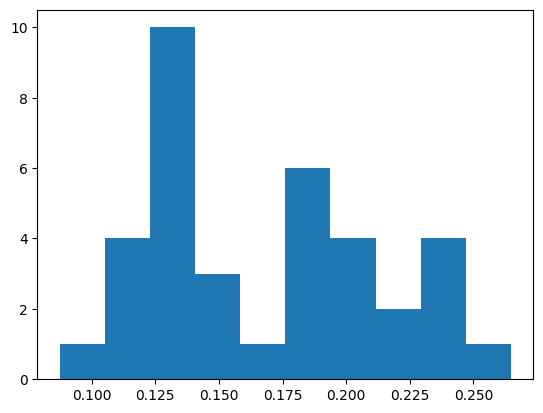

In [ ]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    data1.append(contrast(img))
plt.hist(data1)
plt.show()

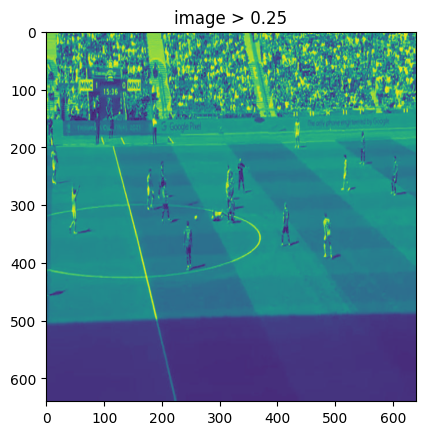

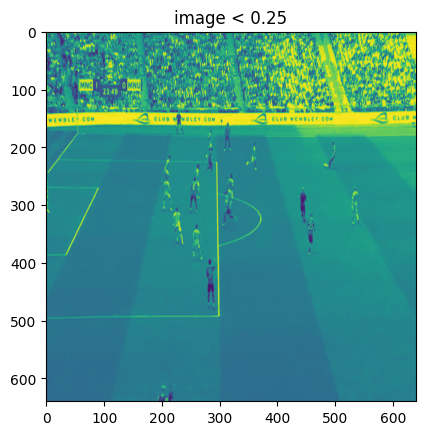

In [ ]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    # img = cv2.resize(imga, (28,28))
    # img = np.array(img, dtype=np.float32) / 255.0
    # img = img.flatten()
    if l1:
      if contrast(imga)>45:
        plt.imshow(imga)
        plt.title("image > 0.25")
        plt.show()
        l1=False
    if l2:
      if contrast(imga)<45:
        plt.imshow(imga)
        plt.title("image < 0.25")
        plt.show()
        l2=False

# t2

In [2]:
!unzip "/content/human body parts.v1i.yolov5pytorch.zip"

Archive:  /content/human body parts.v1i.yolov5pytorch.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/001-2-1-_jpg.rf.d5110f78a54f5e315e65ee2d212c9a6f.jpg  
 extracting: test/images/018267_jpg.rf.c8278e32beb478394a8ab87a3c343c48.jpg  
 extracting: test/images/018514_jpg.rf.64164ba43f8dcfe9a08b165411882fdb.jpg  
 extracting: test/images/096258_jpg.rf.c669d99be2487115c18a6f043aa93af0.jpg  
 extracting: test/images/1000_F_217872175_TDycTFaJHsER9qsjDbNUajQnf4vUmZn5_jpg.rf.194261ffb499dd7a0532a183b7904b08.jpg  
 extracting: test/images/149_jpg.rf.9c70acb5804a426310ea92af3c499f4b.jpg  
 extracting: test/images/160374_jpg.rf.0095afa98bc89ac0697702682f45ffa9.jpg  
 extracting: test/images/160438_jpg.rf.3b9f0dbe7ddd66c3bb448b8d24f375b5.jpg  
 extracting: test/images/160449_jpg.rf.61e4647cb9f49d32e23f35a3072a2613.jpg  
 extracting: test/images/160590_jpg.rf.

## ed

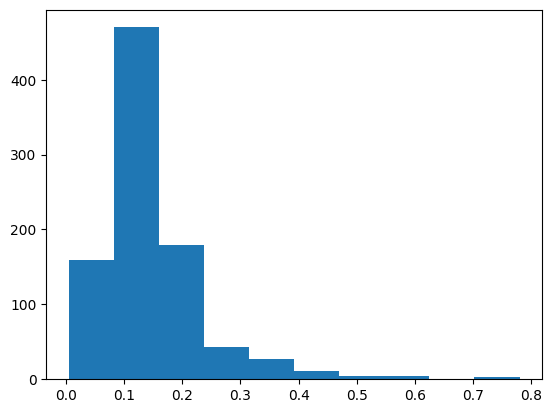

In [104]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/train/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    data1.append(ed(img))
plt.hist(data1)
plt.show()

In [37]:
data_array=np.array(data1)
q1 = np.percentile(data_array, 25)
q3 = np.percentile(data_array, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound,upper_bound)

-0.024316207 0.28383875


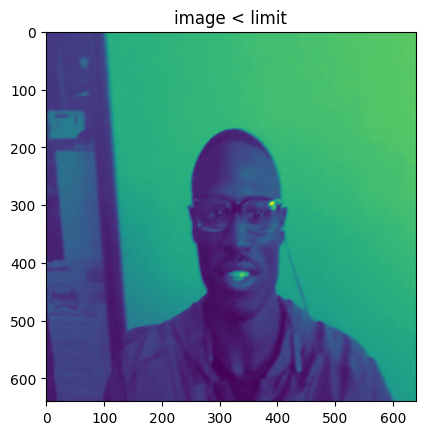

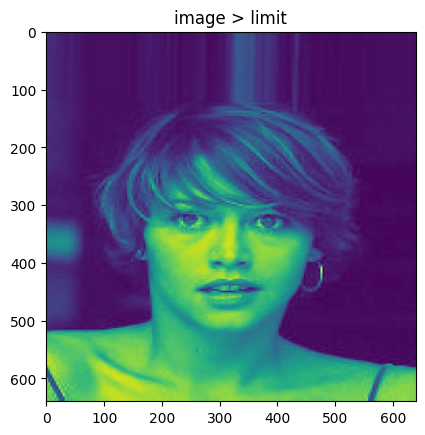

In [40]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(imga, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    if l1:
      if ed(imga)>upper_bound:
        plt.imshow(imga)
        plt.title("image > limit")
        plt.show()
        l1=False
    if l2:
      if ed(imga)<upper_bound:
        plt.imshow(imga)
        plt.title("image < limit")
        plt.show()
        l2=False

##  complexity

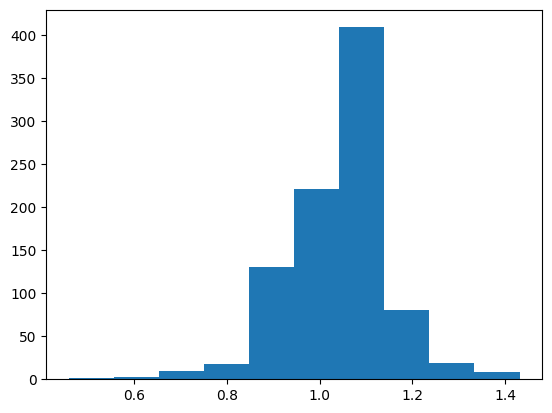

In [101]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/train/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    data1.append(complexity(img))
plt.hist(data1)
plt.show()

In [102]:
data_array=np.array(data1)
q1 = np.percentile(data_array, 25)
q3 = np.percentile(data_array, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound,upper_bound)

0.808552224647512 1.2894973515828214


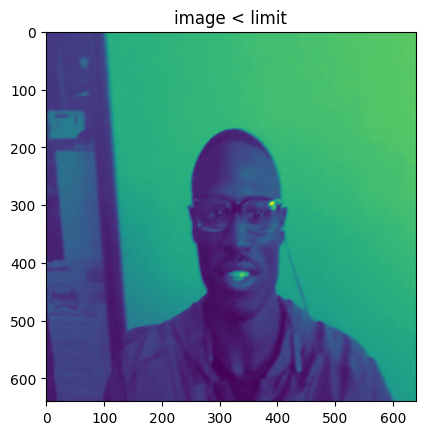

In [96]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(imga, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    if l1:
      if complexity(imga)>upper_bound:
        plt.imshow(imga)
        plt.title("image < limit")
        plt.show()
        l1=False
    if l2:
      if complexity(imga)<lower_bound:
        plt.imshow(imga)
        plt.title("image > limit")
        plt.show()
        l2=False

## brightness

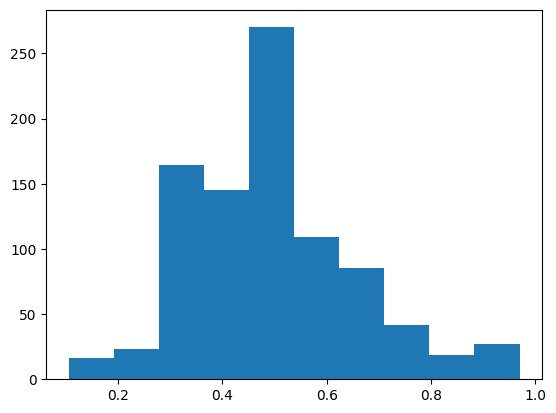

In [111]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/train/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    data1.append(brightness(img))
plt.hist(data1)
plt.show()

In [112]:
data_array=np.array(data1)
q1 = np.percentile(data_array, 25)
q3 = np.percentile(data_array, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound,upper_bound)

0.056939065 0.8901023


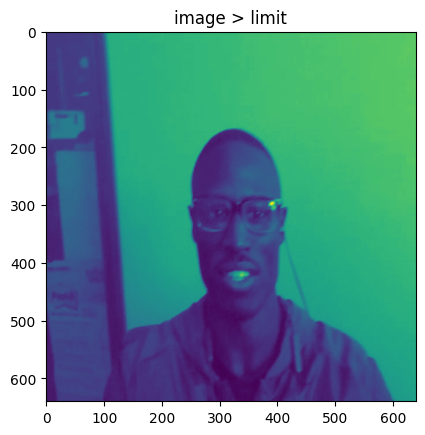

In [108]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(imga, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    if l1:
      if brightness(imga)>upper_bound:
        plt.imshow(imga)
        plt.title("image > limit")
        plt.show()
        l1=False
    if l2:
      if brightness(imga)<lower_bound:
        plt.imshow(imga)
        plt.title("image < limit")
        plt.show()
        l2=False

# t3

In [5]:
!unzip "/content/people- car.v791i.yolov5pytorch.zip"

Archive:  /content/people- car.v791i.yolov5pytorch.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/standing_8_11_23-1-_jpg.rf.c0c39f0ae7120ccdcc8e0ca885f2c88f.jpg  
 extracting: test/images/standing_8_11_23-10-_jpg.rf.2c58dabece38cc759e9368f02e29d694.jpg  
 extracting: test/images/standing_8_11_23-13-_jpg.rf.064185645683be0abef1520ff366b07d.jpg  
 extracting: test/images/standing_8_11_23-14-_jpg.rf.4cdbaae4f998529962869017510a8fb9.jpg  
 extracting: test/images/standing_8_11_23-18-_jpg.rf.3377c4d98ede6ced01bfe3480190bd98.jpg  
 extracting: test/images/standing_8_11_23-23-_jpg.rf.54013303c9ccda795b2779513a01f232.jpg  
 extracting: test/images/standing_8_11_23-26-_jpg.rf.cab685c3362547fdac09b62d3dc4644f.jpg  
 extracting: test/images/standing_8_11_23-27-_jpg.rf.319140471732d9f212711486eab77a0b.jpg  
 extracting: test/images/standing_8_11_23-29-_jpg.r

In [6]:
from re import U
def p(data1):
  data_array=np.array(data1)
  q1 = np.percentile(data_array, 25)
  q3 = np.percentile(data_array, 75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  print(lower_bound,upper_bound)
  return upper_bound,lower_bound

## ed

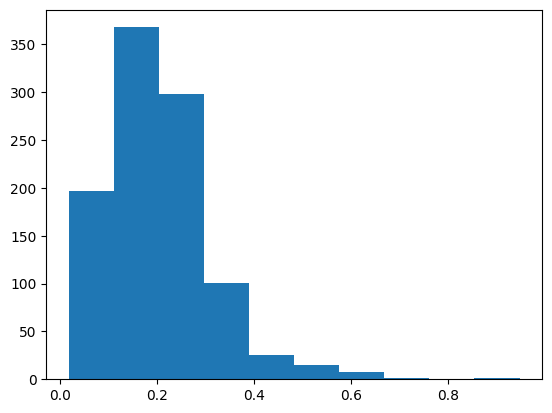

In [7]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/train/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    data1.append(ed(img))
plt.hist(data1)
plt.show()

In [8]:
ul,ll=p(data1)

-0.043123126 0.41854495


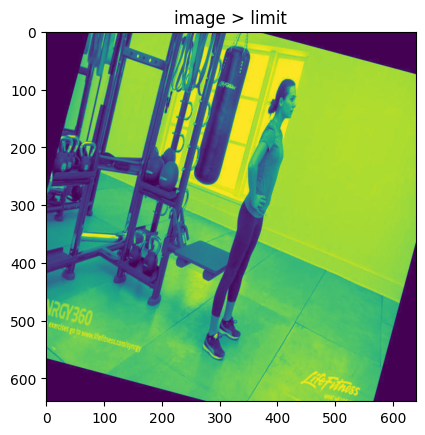

In [10]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(imga, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    if l1:
      if ed(imga)>ul:
        plt.imshow(imga)
        plt.title("image > limit")
        plt.show()
        l1=False
    if l2:
      if ed(imga)<ll:
        plt.imshow(imga)
        plt.title("image < limit")
        plt.show()
        l2=False

## complexity

/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


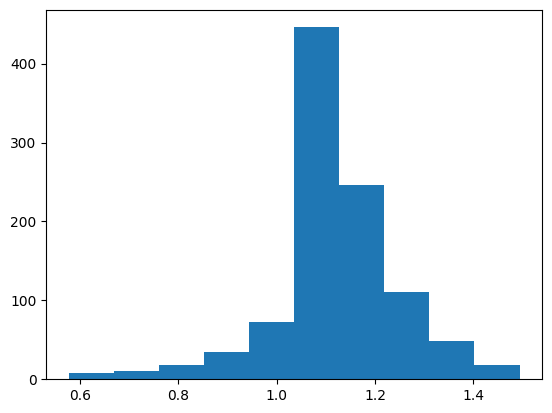

In [11]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/train/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    data1.append(complexity(img))
plt.hist(data1)
plt.show()

In [12]:
ul,ll=p(data1)

0.8995035542607188 1.3496003319362697


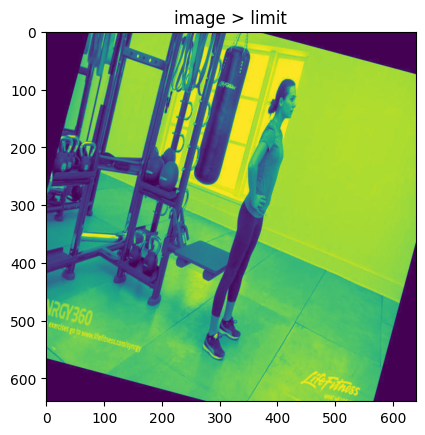

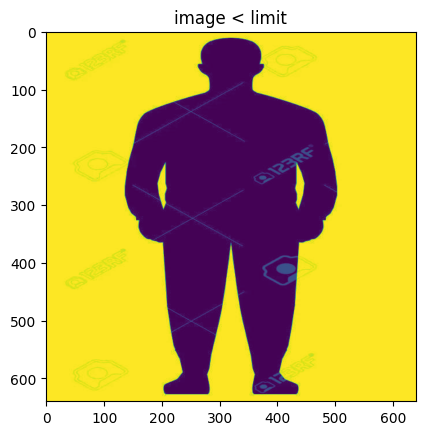

In [14]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(imga, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    if l1:
      if complexity(imga)>ul:
        plt.imshow(imga)
        plt.title("image > limit")
        plt.show()
        l1=False
    if l2:
      if complexity(imga)<ll:
        plt.imshow(imga)
        plt.title("image < limit")
        plt.show()
        l2=False

## brightness

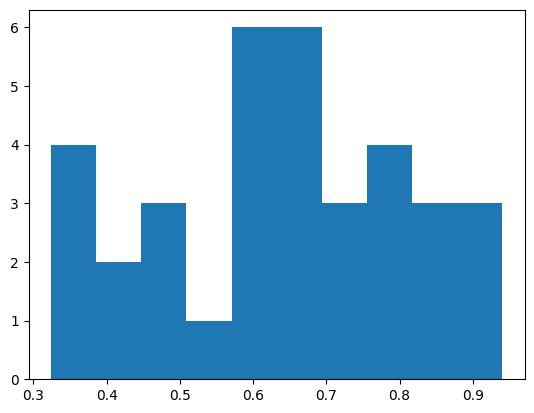

In [22]:
import cv2
import numpy as np
from pathlib import Path
data1=[]
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    data1.append(brightness(img))
plt.hist(data1)
plt.show()

In [23]:
ul,ll=p(data1)

0.11062673 1.1791542


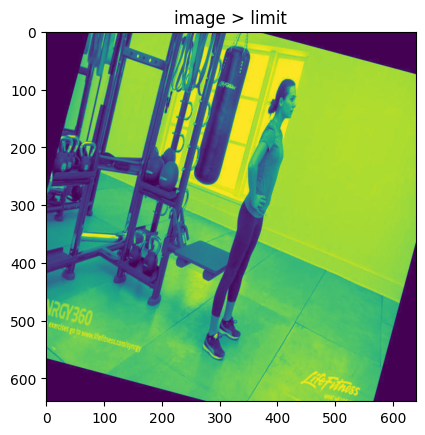

In [24]:
l1,l2=True,True
import cv2
import numpy as np
from pathlib import Path
image_dir = Path('/content/test/images')
for i in image_dir.glob('*.jpg'):
    imga = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(imga, (28,28))
    img = np.array(img, dtype=np.float32) / 255.0
    img = img.flatten()
    if l1:
      if brightness(imga)>ul:
        plt.imshow(imga)
        plt.title("image > limit")
        plt.show()
        l1=False
    if l2:
      if brightness(imga)<ll:
        plt.imshow(imga)
        plt.title("image < limit")
        plt.show()
        l2=False